In [99]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as scs
%matplotlib inline

In [79]:
conn = psycopg2.connect(database="sethhendrickson", user="sethhendrickson", password="abc123",
                        host="localhost", port="5432")
cur = conn.cursor()

In [80]:
df = pd.read_sql("""SELECT * FROM kp_detailed""", conn)
teams = pd.read_sql("""SELECT * FROM teams""", conn)
teams = teams[['team_id', 'team_name', 'conf']]
teams.head()

,team_id,team_name,conf
0,1355,S Dakota St,Sum
1,1170,CS Sacramento,BSky
2,1322,Northwestern LA,Slnd
3,1103,Akron,MAC
4,1261,LSU,SEC


In [81]:
df = df[df.neutral == 0]

In [82]:
df['home_margin'] = df.apply(lambda x: x.score1 - x.score2 if x.team1_id==x.hteam else x.score2-x.score1, axis=1)
df['predicted_home_margin'] = df.apply(lambda x: x.predicted_score - x.predicted_score2 if x.team1_id==x.hteam else x.predicted_score2-x.predicted_score, axis=1)

In [110]:
teamids = teams.team_id.values
significant_teams = []
for teamid in teamids:
    teamdf = df[(df.hteam == teamid)]
    if teamdf.shape[0] == 0:
        continue
    (t, p) = scs.ttest_ind(teamdf.home_margin.values, teamdf.predicted_home_margin.values)
    if p < 0.05:
        significant_teams.append(teamid)

In [111]:
teams[teams.team_id.isin(significant_teams)]

,team_id,team_name,conf
0,1355,S Dakota St,Sum
37,1176,Denver,Sum
52,1346,Quinnipiac,MAAC
53,1235,Iowa St,B12
66,1328,Oklahoma,B12
122,1138,Buffalo,MAC
127,1320,Northern Iowa,MVC
138,1160,Colorado,P12
176,1157,Coastal Car,BSth
195,1277,Michigan St,B10


In [83]:
df['hmargin_diff'] = df.home_margin - df.predicted_home_margin
df = df[df.predicted_home_margin.abs() < 10]
df.head()

,dt,team1,score1,team2,score2,predicted,predicted_score,predicted_score2,venue,city,...,team1_id,team2_id,loc,wloc,hteam,ateam,neutral,home_margin,predicted_home_margin,hmargin_diff
0,2010-11-28,Florida,55,Florida St.,51,Florida St.,71,67,Donald L. Tucker Center,Tallahassee,...,1196,1199,A,A,1199,1196,0,-4,-4,0
5,2010-11-28,Harvard,82,Colorado,66,Colorado,72,71,Lavietes Pavilion,Boston,...,1217,1160,H,H,1217,1160,0,16,1,15
6,2010-11-28,Princeton,86,Siena,77,Siena,67,65,L. Stockwell Jadwin Gymnasium,Princeton,...,1343,1373,H,H,1343,1373,0,9,2,7
7,2010-11-28,Northwestern,65,Creighton,52,Northwestern,75,68,Welsh-Ryan Arena,Evanston,...,1321,1166,H,H,1321,1166,0,13,7,6
8,2010-11-28,Northern Arizona,88,Pepperdine,74,Pepperdine,70,69,Firestone Fieldhouse,Malibu,...,1319,1337,A,A,1337,1319,0,-14,-1,-13


In [84]:
gb = df.groupby('hteam').mean()
gb2 = df.groupby('hteam').count()

In [85]:
gb.sort('hmargin_diff', ascending=False).head()

,score1,score2,predicted_score,predicted_score2,team1_id,team2_id,ateam,neutral,home_margin,predicted_home_margin,hmargin_diff
hteam,,,,,,,,,,,
1211,75.500000,63.166667,74.666667,69.583333,1243.750000,1275.083333,1307.833333,0,10.333333,3.916667,6.416667
1455,72.800000,60.700000,69.100000,63.000000,1437.800000,1346.000000,1328.800000,0,11.500000,5.100000,6.400000
1293,74.666667,63.000000,71.166667,66.708333,1291.708333,1289.333333,1288.041667,0,9.833333,3.625000,6.208333
1355,79.153846,65.500000,75.076923,69.423077,1347.384615,1296.115385,1288.500000,0,8.961538,2.961538,6.000000
1112,71.666667,61.533333,69.400000,63.266667,1165.733333,1284.466667,1338.200000,0,9.066667,3.200000,5.866667


In [86]:
margin = pd.DataFrame({'team': gb.index.values, 'avg_margin_diff': gb.hmargin_diff.values, 'avg_margin':gb.home_margin.values})
gp = pd.DataFrame({'team': gb2.index.values, 'gp': gb2.score1.values})

In [90]:
margin = pd.merge(margin, teams, left_on='team', right_on='team_id')
margin = pd.merge(margin, gp, left_on='team', right_on='team')
margin.sort('avg_margin_diff', ascending=False).head(10)

,avg_margin,avg_margin_diff,team,team_id_x,team_name_x,conf_x,gp_x,team_id_y,team_name_y,conf_y,gp_y,team_id,team_name,conf,gp
101,10.333333,6.416667,1211,1211,Gonzaga,WCC,12,1211,Gonzaga,WCC,12,1211,Gonzaga,WCC,12
334,11.500000,6.400000,1455,1455,Wichita St,MVC,10,1455,Wichita St,MVC,10,1455,Wichita St,MVC,10
181,9.833333,6.208333,1293,1293,Murray St,OVC,24,1293,Murray St,OVC,24,1293,Murray St,OVC,24
239,8.961538,6.000000,1355,1355,S Dakota St,Sum,26,1355,S Dakota St,Sum,26,1355,S Dakota St,Sum,26
9,9.066667,5.866667,1112,1112,Arizona,P12,15,1112,Arizona,P12,15,1112,Arizona,P12,15
293,8.000000,5.388889,1411,1411,TX Southern,SWAC,18,1411,TX Southern,SWAC,18,1411,TX Southern,SWAC,18
131,9.421053,5.263158,1242,1242,Kansas,B12,19,1242,Kansas,B12,19,1242,Kansas,B12,19
124,8.093023,5.232558,1235,1235,Iowa St,B12,43,1235,Iowa St,B12,43,1235,Iowa St,B12,43
106,9.736842,5.052632,1217,1217,Harvard,Ivy,19,1217,Harvard,Ivy,19,1217,Harvard,Ivy,19
341,7.936170,4.723404,1462,1462,Xavier,BE,47,1462,Xavier,BE,47,1462,Xavier,BE,47


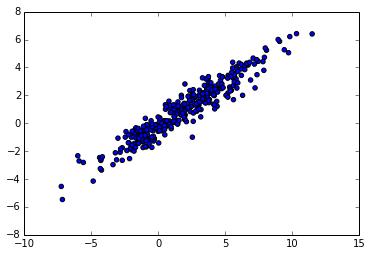

In [88]:
# major_conf = ['B10', 'ACC', 'BE', 'P12', 'SEC']
# major_conf=['B10']
# new = margin[margin.conf.isin(major_conf)].sort('avg_margin_diff', ascending=False)
# new.to_csv('B10.csv')
margin
plt.scatter(margin.avg_margin, margin.avg_margin_diff)

In [38]:
df[df.hteam==1355][['dt','home_margin','predicted_home_margin', 'hmargin_diff', 'venue', 'team1', 'team2', 'wloc']].sort('dt')

,dt,home_margin,predicted_home_margin,hmargin_diff,venue,team1,team2,wloc
3731,2010-11-27,26,9,17,Frost Arena,South Dakota St.,Eastern Illinois,H
22399,2010-11-30,17,10,7,Frost Arena,South Dakota St.,Nevada,H
67,2010-12-04,-7,-7,0,Frost Arena,North Dakota St.,South Dakota St.,A
202,2010-12-11,-12,-9,-3,Frost Arena,Milwaukee,South Dakota St.,A
3906,2011-01-08,-8,-7,-1,Frost Arena,Oral Roberts,South Dakota St.,A
11378,2011-01-20,-9,-3,-6,Frost Arena,Oakland,South Dakota St.,A
601,2011-01-22,35,8,27,Frost Arena,South Dakota St.,IPFW,H
19638,2011-02-10,11,5,6,Frost Arena,South Dakota St.,IUPUI,H
19880,2011-11-12,6,3,3,Frost Arena,South Dakota St.,Western Michigan,H
20080,2011-12-30,12,13,-1,Frost Arena,South Dakota St.,Oakland,H


In [39]:
df = pd.read_sql("""SELECT * FROM kp_detailed""", conn)

In [40]:
df['winner'] = df.apply(lambda x: x.team1 if x.score1 > x.score2 else x.team2, axis=1)
df['correct'] = df.winner == df.predicted

In [41]:
df['month'] = df.dt.map(lambda x: x.month)

In [42]:
gb = df.groupby('month').mean()

In [43]:
gb.head()

,score1,score2,predicted_score,predicted_score2,team1_id,team2_id,hteam,ateam,neutral,correct
month,,,,,,,,,,
1,73.373469,62.409621,71.489892,63.775122,1285.255423,1283.172938,1284.330825,1284.097536,0.003246,0.709901
2,73.138378,62.483283,71.151016,63.859382,1285.647256,1282.525996,1284.099824,1284.073428,0.002240,0.724844
3,72.785772,62.304662,70.834807,64.307476,1289.063103,1287.752412,1287.392283,1289.423232,0.448151,0.719453
11,75.720772,61.960110,72.935285,63.310842,1287.398260,1283.661999,1288.062805,1282.997454,0.232548,0.781456
12,74.533528,61.390282,72.713508,62.918562,1287.067444,1281.372983,1286.988338,1281.452089,0.078523,0.781535


In [44]:
df.columns

Index([u'dt', u'team1', u'score1', u'team2', u'score2', u'predicted',
       u'predicted_score', u'predicted_score2', u'venue', u'city', u'state',
       u'tm', u'team1_id', u'team2_id', u'loc', u'wloc', u'hteam', u'ateam',
       u'neutral', u'winner', u'correct', u'month'],
      dtype='object')

In [52]:
gb = df.groupby('month').mean()

In [53]:
gb

,score1,score2,predicted_score,predicted_score2,team1_id,team2_id,hteam,ateam,neutral,correct,score_bin
month,,,,,,,,,,,
1,73.373469,62.409621,71.489892,63.775122,1285.255423,1283.172938,1284.330825,1284.097536,0.003246,0.709901,126.847587
2,73.138378,62.483283,71.151016,63.859382,1285.647256,1282.525996,1284.099824,1284.073428,0.002240,0.724844,126.662794
3,72.785772,62.304662,70.834807,64.307476,1289.063103,1287.752412,1287.392283,1289.423232,0.448151,0.719453,126.031672
11,75.720772,61.960110,72.935285,63.310842,1287.398260,1283.661999,1288.062805,1282.997454,0.232548,0.781456,128.650133
12,74.533528,61.390282,72.713508,62.918562,1287.067444,1281.372983,1286.988338,1281.452089,0.078523,0.781535,126.904660


In [59]:
df['year'] = df.dt.map(lambda x: x.year)

In [62]:
df.groupby('year').mean().head(10)

,score1,score2,predicted_score,predicted_score2,team1_id,team2_id,hteam,ateam,neutral,correct,month,score_bin
year,,,,,,,,,,,,
2010,75.468955,62.045432,73.506310,62.510348,1285.511863,1284.214033,1287.338718,1282.387178,0.151943,0.793034,11.549722,128.471643
2011,74.034347,62.183972,72.040071,63.502961,1285.241216,1284.891630,1287.020924,1283.111923,0.099289,0.744572,5.670746,127.113324
2012,73.095779,61.167817,71.222606,62.470373,1286.324675,1283.084010,1286.275974,1283.132711,0.105925,0.753653,5.547890,125.273118
2013,74.646932,62.753147,72.159717,63.777537,1286.018096,1284.867231,1286.305468,1284.579858,0.108576,0.738985,5.481904,128.432165
2014,74.421805,62.710511,72.762184,65.335095,1288.001762,1280.572911,1284.416520,1284.158152,0.105304,0.732237,5.492464,128.152564
2015,72.169058,61.641298,69.615097,63.022770,1287.666875,1281.529944,1283.640050,1285.556769,0.073300,0.711478,1.699002,124.999891
